# SAES for Machine Learning Models Benchmarking

This notebook demonstrates how to use the **SAES** library in a machine learning context. As a case study, we will analyze the performance of different machine learning models—SVM (Support Vector Machine), RandomForest, KNN (K-Nearest Neighbors), and MLP (Multi-Layer Perceptron)—against different versions of the Iris dataset. In machine learning, performance evaluation typically involves metrics like **accuracy** and **loss**. We'll compare the models across different Iris dataset versions using these metrics to identify the best-performing model for various versions of the dataset.

## **Iris Dataset Versions**

The **Iris dataset** is one of the most well-known datasets in machine learning, commonly used for classification problems. It consists of 150 samples from three species of Iris flowers: **Setosa**, **Versicolor**, and **Virginica**. Each sample has four features: sepal length, sepal width, petal length, and petal width. However, in this study, we will use different versions of the dataset to examine how the models perform across varying conditions:

1. **Iris Extended**: A more feature-rich version of the Iris dataset. It includes additional features beyond the original four, making it more complex and suitable for models that handle a larger feature space. This version may also include slight variations or augmented features to enhance the variety of the data.

2. **Iris Species (UCI or Kaggle)**: The most commonly used version of the dataset, often referred to as the "Iris dataset" or "Iris flowers" dataset. It can be found in both the UCI Machine Learning Repository and on platforms like Kaggle. It contains the same 150 samples from three species, and its purpose is to benchmark machine learning models on classification tasks.

3. **Iris (Fisher, 1936)**: The original version of the Iris dataset, created by Ronald A. Fisher in 1936. This version contains the classic 150 samples with four features per sample. It is historically significant and widely used in literature as a simple example of multi-class classification problems.

Each of these versions presents unique characteristics and challenges for machine learning models:

- **Iris Extended** may require models capable of handling high-dimensional data.
- **Iris Species (UCI/Kaggle)** is typically clean, balanced, and easy to use, making it ideal for baseline comparisons between models.
- **Iris (Fisher, 1936)** is a simple, classic version, often serving as a benchmark for the performance of classification algorithms.

The different dataset versions will test how each model (SVM, RandomForest, KNN, MLP) performs under conditions of increasing complexity, such as dealing with additional features, real-world noise, or potential data imbalance.

## **Comparison of Models**

We will evaluate the following machine learning models:

- **SVM (Support Vector Machine)**: A supervised learning algorithm primarily used for classification tasks. SVM is effective in high-dimensional spaces and when there is a clear margin of separation.
- **RandomForest**: An ensemble learning method that constructs a number of decision trees during training and outputs the class that is the majority among the trees.
- **KNN (K-Nearest Neighbors)**: A non-parametric method used for classification and regression. The algorithm makes predictions based on the proximity of data points in the feature space.
- **MLP (Multi-Layer Perceptron)**: A type of neural network consisting of multiple layers of nodes that can learn complex patterns in the data.

## **Metrics for Performance Evaluation**

We will use the following metrics to assess the performance of the models:

- **Accuracy**: The percentage of correct predictions made by the model. It is one of the most common metrics used in classification tasks.
- **Loss**: The loss function quantifies how well the model’s predictions match the actual labels. We will use categorical cross-entropy loss for classification tasks, which measures the difference between the predicted probability distribution and the true distribution.

## **Why the Iris Dataset and These Models?**

The **Iris dataset** is widely used for classification problems because it is simple and provides a straightforward example for testing machine learning algorithms. By evaluating models like **SVM**, **RandomForest**, **KNN**, and **MLP**, we can compare both traditional machine learning algorithms (e.g., RandomForest and SVM) and more modern deep learning methods (e.g., MLP). The addition of dataset versions like noisy data, missing values, and imbalanced classes allows us to test the robustness and adaptability of these models under different real-world conditions.

These models have different strengths:
- **SVM** is effective in high-dimensional spaces, making it suitable for datasets with many features.
- **RandomForest** is robust to overfitting and can handle complex datasets with many features.
- **KNN** is simple to implement and effective when there are clear patterns or groupings in the data.
- **MLP** can model non-linear relationships and capture complex patterns in large datasets.

By comparing these models on different versions of the Iris dataset, we can get insights into their performance in various scenarios, from clean data to noisy, incomplete, or imbalanced datasets.

In [13]:
from SAES.latex_generation.stats_table import Friedman
from SAES.latex_generation.stats_table import Wilcoxon
from SAES.plots.boxplot import Boxplot
from SAES.plots.CDplot import CDplot
from SAES.plots.Pplot import Pplot
from SAES.plots.violin import Violin
from SAES.plots.HistoPlot import HistoPlot

import pandas as pd

In [14]:
# Load the experiment data
experimentData = pd.read_csv('ml_data.csv')
metrics = pd.read_csv('ml_metrics.csv')

## Loss quality indicator

In [15]:
metric = "loss"

## Friedman table

In [16]:
friedman = Friedman(experimentData, metrics, metric)
friedman.show()

,SVM,MLP,KNN,RandomForest,Friedman
"Iris (Fisher, 1936)",1.0480e-01,1.6680e-01,2.4060e-01,3.1850e-02,+
Iris Extended,1.1195e-01,1.6635e-01,2.5350e-01,2.4500e-02,+
Iris Species (UCI o Kaggle),1.1315e-01,1.6335e-01,2.3160e-01,3.5650e-02,+


The Friedman test evaluates performance differences among models across different datasets. In the table:

- The models **SVM, MLP, KNN, and RandomForest** are compared.
- **RandomForest achieves the lowest values** (highlighted in green), indicating better performance.
- The **'+'** symbol in the last column suggests that the differences found are statistically significant.

## Wilcoxon rank-sum test table

In [17]:
wilcoxon = Wilcoxon(experimentData, metrics, metric)
wilcoxon.show()

,MLP,KNN,RandomForest
SVM,+++,+++,---
MLP,,+++,---
KNN,,,---


The Wilcoxon test performs pairwise comparisons between models:

- **MLP and KNN are significantly worse than SVM** (marked with `+++`).
- **RandomForest shows to be the best performance model among all** (indicated by `---`).

## Critical distance ranking

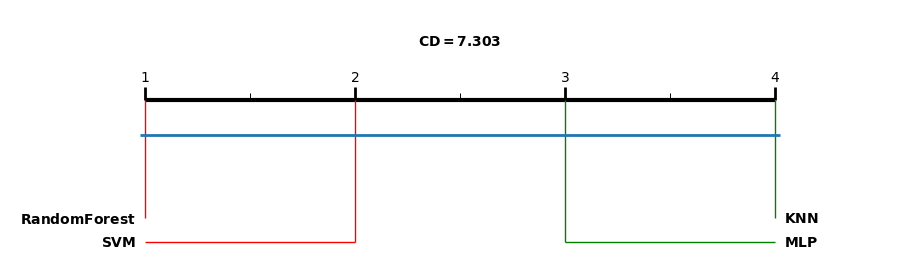

In [18]:
cdplot = CDplot(experimentData, metrics, metric)
cdplot.show()

The **CD plot** visually represents the ranking of models based on performance while indicating statistically significant differences.
- The **x-axis represents the ranks** of the models (lower rank = better performance).
- **RandomForest and SVM** are grouped together on the left, suggesting they should perform better than the rest.
- The **horizontal blue line**, however, indicates that the performance of all four models is not significantly different from each other.

## Boxplots

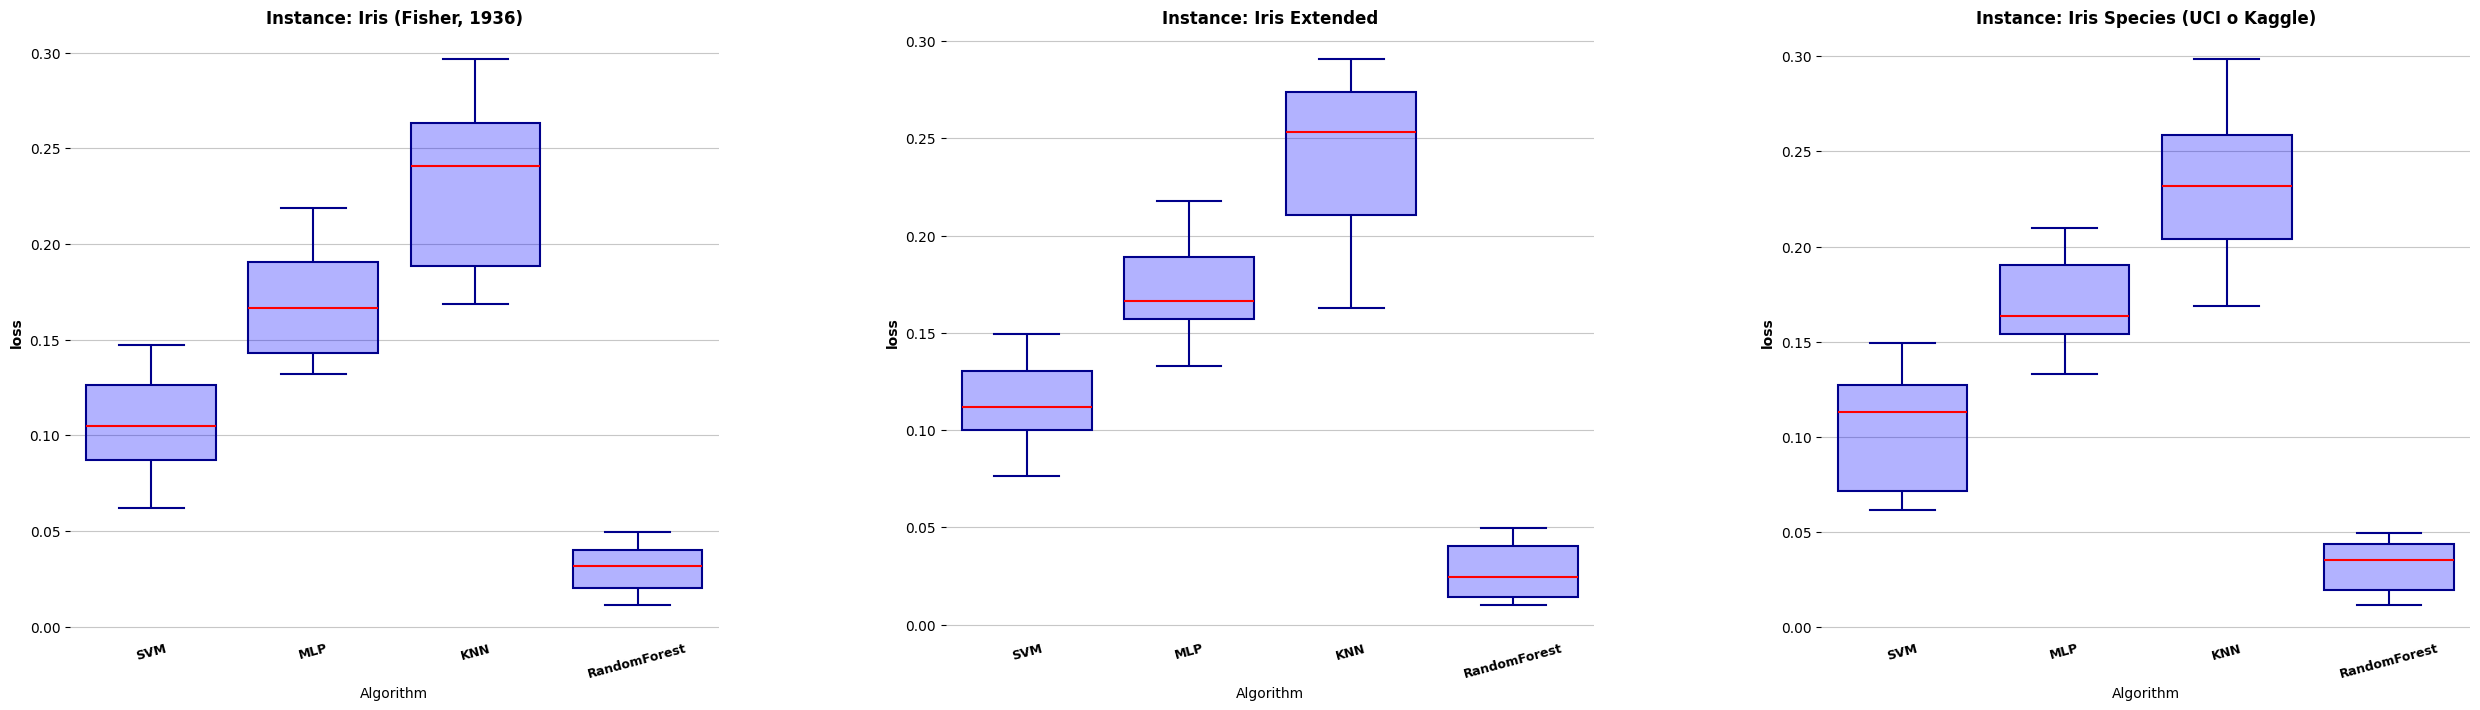

In [19]:
boxplot = Boxplot(experimentData, metrics, metric)
boxplot.show_all_instances()

This boxplot compares the performance of four algorithms (**SVM, MLP, KNN, and RandomForest**) on the different 3 **Iris datasets** used in terms of **loss** (lower is better).  

- **RandomForest has the lowest loss**, indicating the best performance with the smallest variance.  
- **SVM performs better than MLP and KNN**, with a lower median loss.  
- **MLP has a higher loss than SVM** and more variability in performance.  
- **KNN has the highest loss and largest spread**, making it the worst-performing algorithm.  

## Violin Plots

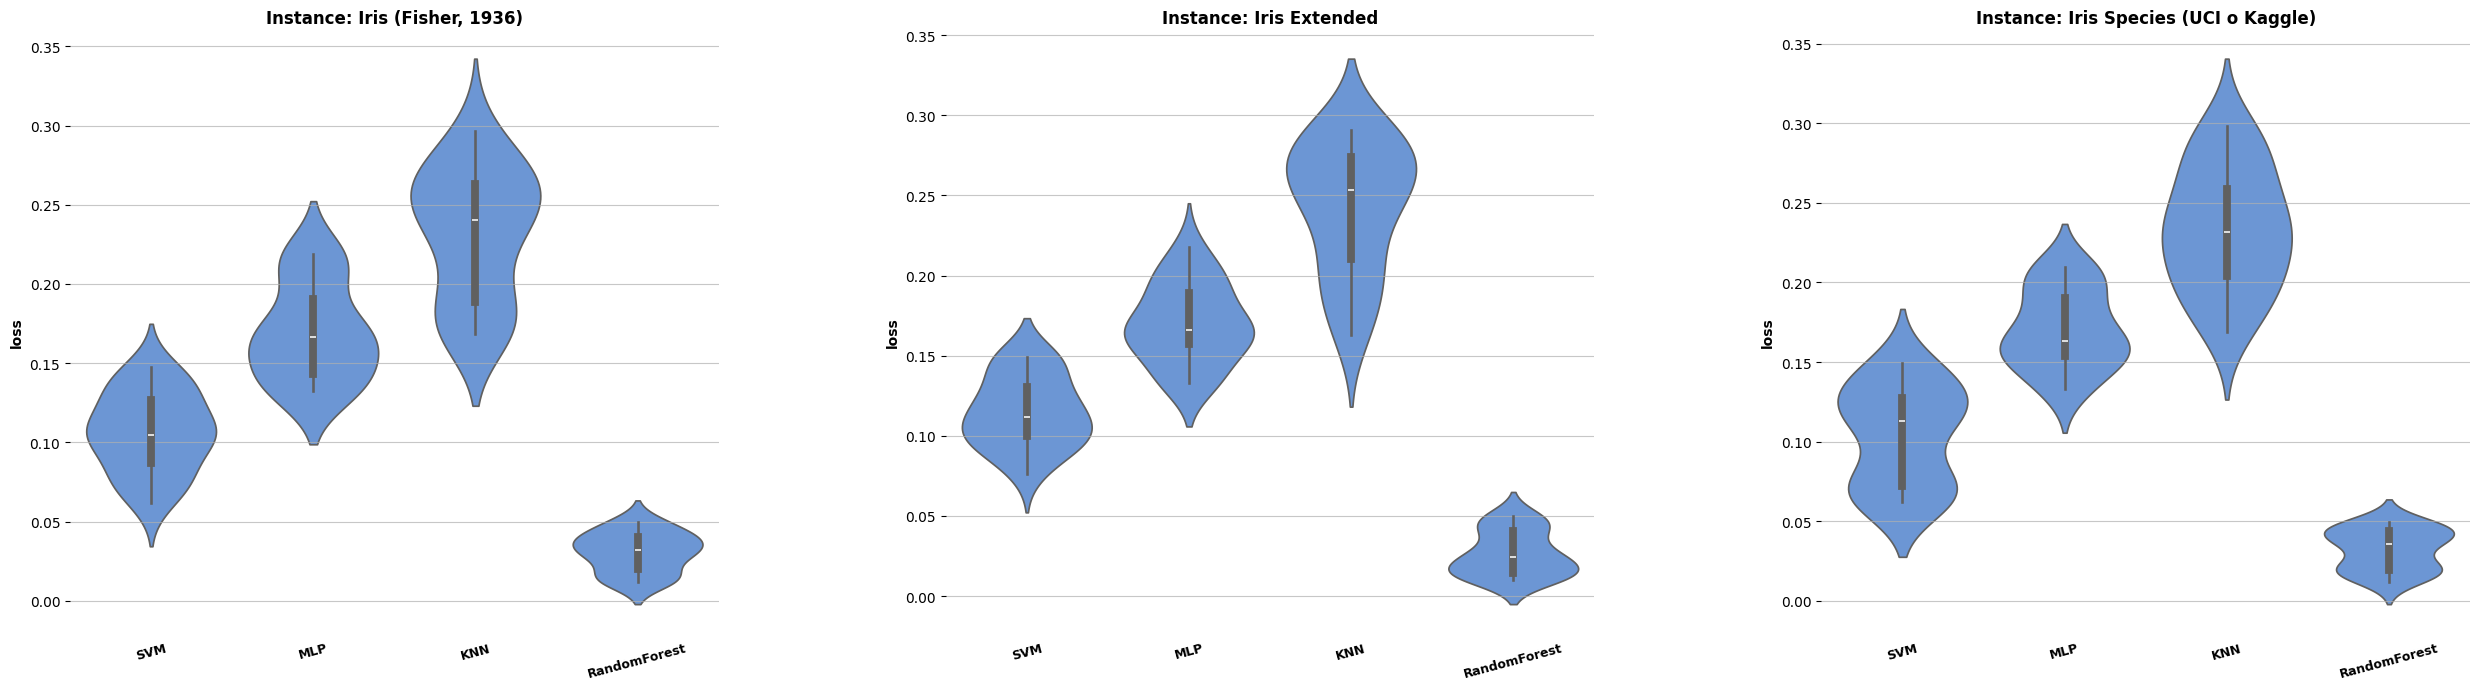

In [20]:
violin = Violin(experimentData, metrics, metric)
violin.show_all_instances()

## HistoPlots

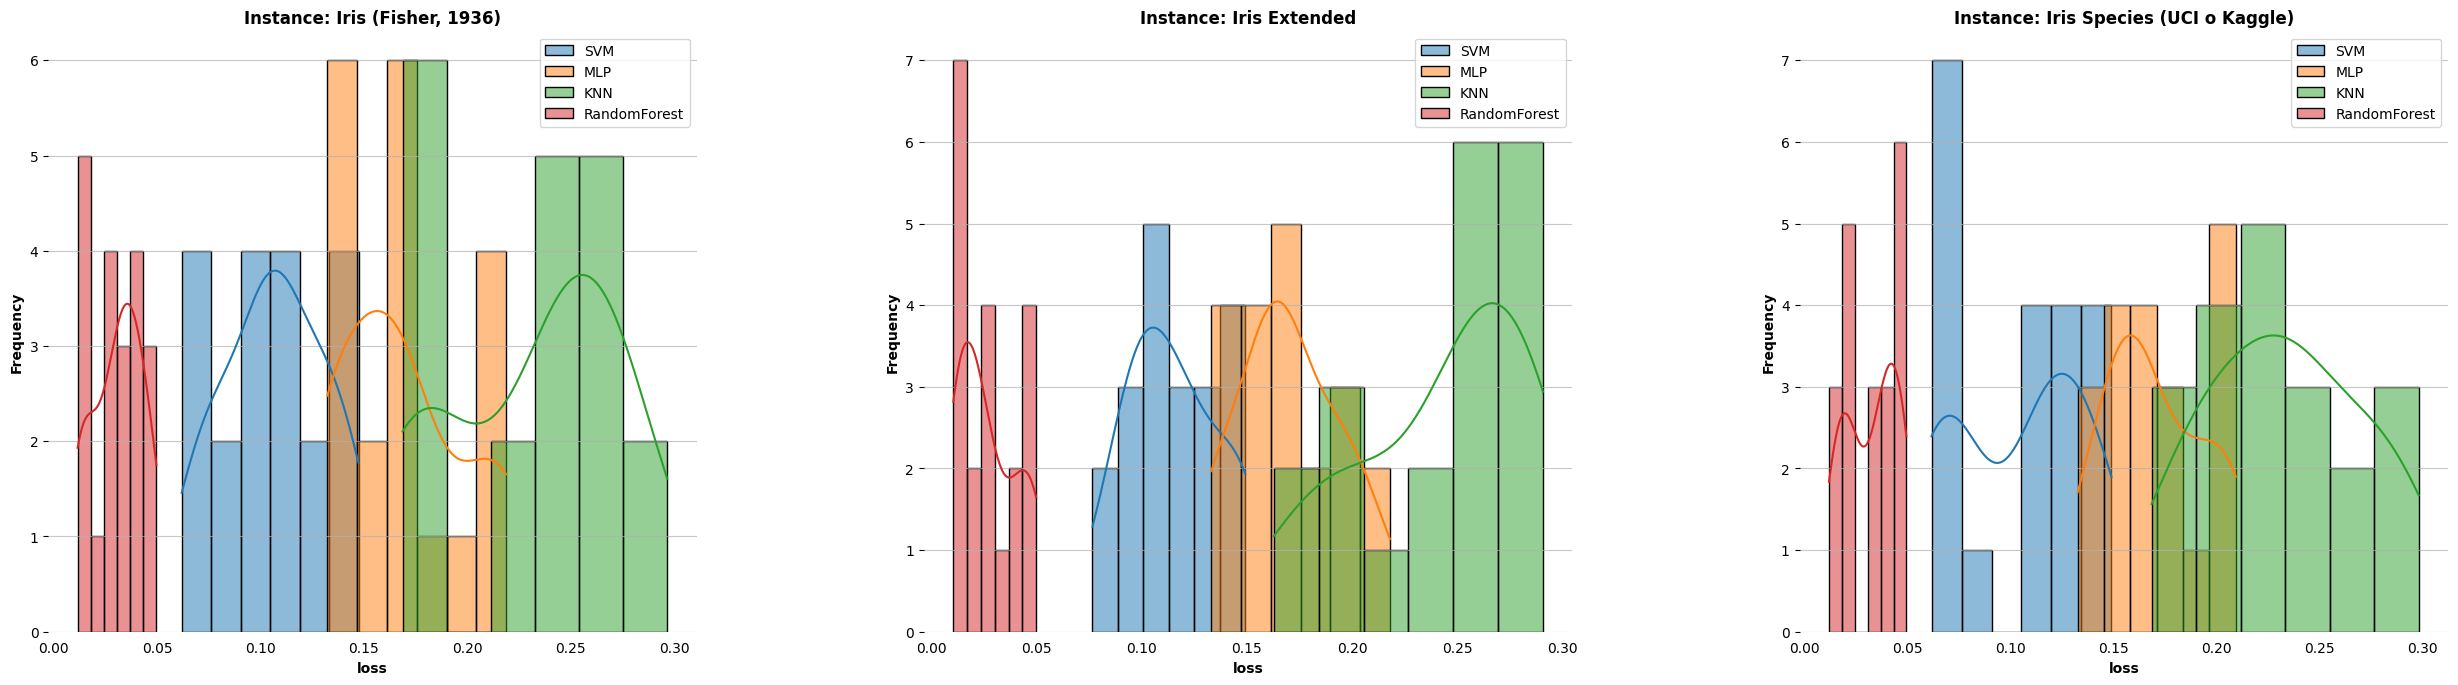

In [21]:
histoplot = HistoPlot(experimentData, metrics, metric)
histoplot.show_all_instances()

## Bayesian Posterior Graphs

In [22]:
sign = Pplot(experimentData, metrics, metric, bayesian_test="sign")
rank = Pplot(experimentData, metrics, metric, bayesian_test="rank")

### Bayesian Sign Test

- The Bayesian Sign Test is a **simpler** statistical method that assesses the probability that one algorithm is better than another based on direct pairwise comparisons.
- It only considers **the direction of differences** (i.e., which algorithm performs better), ignoring the magnitude of the differences.
- It assumes that the comparisons are independent and does not account for the distribution of the differences.

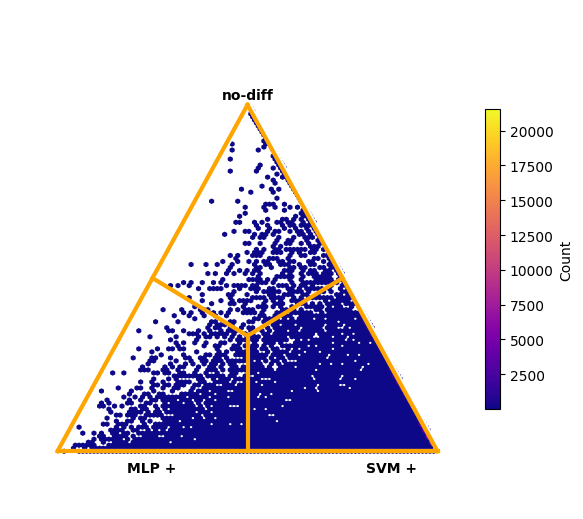

In [23]:
sign.show("MLP", "SVM", sample_size=10000)

This ternary plot visualizes the comparison between **MLP and SVM**, with an additional "no-diff" category indicating cases where there is no significant difference between the two models.  

- The **three regions** represent different outcomes:  
  - **"MLP +"** (bottom-left): MLP performs better than SVM.  
  - **"SVM +"** (bottom-right): SVM performs better than MLP.  
  - **"no-diff"** (top): No significant difference between the models.  
- The **density of points** is represented by color:  
  - **Dark blue areas** indicate lower counts.  
  - **Yellow areas** (if present) indicate higher counts.  
- Most points are **spread in the SVM+ region**, indicating that the performance of the SVM model is slightly better (because it is not extremely predominant).  

### Bayesian Signed Rank Test
- The Bayesian Signed Rank Test is **more informative** as it takes into account both the **direction and magnitude** of differences between algorithm performances.
- It is based on the **Wilcoxon Signed Rank Test**, which ranks the absolute differences and considers their signs.
- This test provides a more robust estimation of superiority, especially when differences are small or skewed.

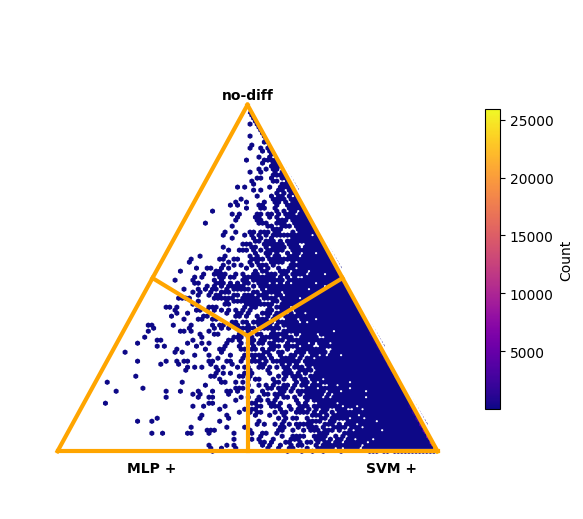

In [24]:
rank.show("MLP", "SVM", sample_size=10000)

Most points are **spread across the SVM+ region and the no-diff region**, indicating that the performance of the SVM model is similar to that of the MLP model. Given the close match in the Bayesian Sign test and the tie in the Signed Rank test, we can conclude that, according to Bayesian tests, the difference between MLP and SVM is not significant.